## 梯度
导数+下降最快的方向 = 梯度

### 1.向前计算
对于PyTorch中的一个tensor没如果设置它的属性`requires_grad`为`True`，那么会追踪该张量的所有操作。或者可以理解为，这个tensor是一个参数，后续会被计算梯度，更新该参数。tensor所有的操作都会被记录在`grad_fn`中

计算过程
假设x为参数，需要对其进行梯度的计算和更新

In [7]:
import torch
x = torch.ones(2,2,requires_grad = True) #初始化x并设置记录梯度
print(x)

y = x+2
z = y*y*3
print(z)

out = z.mean() # 求均值
print(out)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [8]:
print(z.grad_fn)

### 2.反向传播

对于上述中的out而言，我们可以使用backward方法进行反向传播，计算梯度，
可求出dout/dx,再调用x.grad能够获取其梯度值。

In [9]:
out.backward()

In [10]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

<red>注</red>:<br> 
1.每次调用out.backward()都会计算梯度并累加到x.grad中。<br>
    所以在for循环中计算梯度时，需要先将梯度清空。<br>
2.使用了`required_grad = True`后要使用tensor，不能直接用，要使用`x.data`，如果要转换为numpy类型,`tensor.detach().numpy`

## 线性回归Demo

In [17]:
learning_rate = 0.01

# 1.准备数据
# y = 3x+0.8
x = torch.rand([500,1])* 10
y_true = x*3+8

w = torch.rand([1,1],requires_grad = True)
b = torch.tensor(0,requires_grad = True,dtype = torch.float)
print(b)
# 4. 通过循环，反向传播，更新参数
for i in range(1000):
    # 2.通过模型计算y_predict
    y_predict = torch.matmul(x,w) + b

    # 3.计算Loss
    loss = torch.mean((y_true - y_predict).pow(2))
    if w.grad is not None:
        w.data.zero_()
    if b is not None:
        b.data.zero_()
        
    loss.backward()# 反向传播
    w.data = w.data - learning_rate*w.grad
    b.data = b.data - learning_rate*b.grad
    print("w,b,loss-----",w.item(),b.item(),loss.item())
    
    


tensor(0., requires_grad=True)
w,b,loss----- 3.058194398880005 0.40812382102012634 465.4822692871094
w,b,loss----- 3.2231407165527344 0.5540183782577515 53.2412109375
w,b,loss----- 3.8300912380218506 0.6801502704620361 40.18702697753906
w,b,loss----- 4.00676155090332 0.7417761087417603 15.221959114074707
w,b,loss----- 4.055643081665039 0.784127414226532 12.909161567687988
w,b,loss----- 4.066583633422852 0.8206397294998169 12.595952033996582
w,b,loss----- 4.0662713050842285 0.855304479598999 12.460197448730469
w,b,loss----- 4.062633991241455 0.8893078565597534 12.341115951538086
w,b,loss----- 4.058025360107422 0.9230026006698608 12.224520683288574
w,b,loss----- 4.053145408630371 0.9564940929412842 12.10914421081543
w,b,loss----- 4.048201084136963 0.9898142218589783 11.994863510131836
w,b,loss----- 4.0432538986206055 1.022972822189331 11.881665229797363
w,b,loss----- 4.038322448730469 1.0559734106063843 11.76953411102295
w,b,loss----- 4.033412456512451 1.0888175964355469 11.6584625244140

w,b,loss----- 3.3084795475006104 5.936973571777344 1.0388336181640625
w,b,loss----- 3.307020425796509 5.9467315673828125 1.029030203819275
w,b,loss----- 3.3055684566497803 5.9564433097839355 1.0193188190460205
w,b,loss----- 3.3041231632232666 5.966108798980713 1.0096989870071411
w,b,loss----- 3.3026845455169678 5.975728511810303 1.0001707077026367
w,b,loss----- 3.301253080368042 5.9853034019470215 0.990731418132782
w,b,loss----- 3.299828052520752 5.994832515716553 0.9813812375068665
w,b,loss----- 3.298409938812256 6.004316806793213 0.9721196889877319
w,b,loss----- 3.2969985008239746 6.013755798339844 0.962945818901062
w,b,loss----- 3.295593738555908 6.023150444030762 0.9538581371307373
w,b,loss----- 3.2941958904266357 6.032500267028809 0.9448564648628235
w,b,loss----- 3.29280424118042 6.041806697845459 0.9359398484230042
w,b,loss----- 3.291419267654419 6.0510687828063965 0.9271063208580017
w,b,loss----- 3.2900407314300537 6.060286521911621 0.9183569550514221
w,b,loss----- 3.28866910934

w,b,loss----- 3.083752155303955 7.439889430999756 0.07657450437545776
w,b,loss----- 3.0833559036254883 7.442538261413574 0.07585180550813675
w,b,loss----- 3.0829615592956543 7.4451751708984375 0.07513611763715744
w,b,loss----- 3.082569122314453 7.4477996826171875 0.07442697137594223
w,b,loss----- 3.082178831100464 7.450411319732666 0.07372450083494186
w,b,loss----- 3.0817902088165283 7.453010559082031 0.07302884012460709
w,b,loss----- 3.0814030170440674 7.455597877502441 0.07233966141939163
w,b,loss----- 3.0810182094573975 7.4581732749938965 0.07165691256523132
w,b,loss----- 3.0806350708007812 7.46073579788208 0.07098052650690079
w,b,loss----- 3.0802536010742188 7.463286399841309 0.0703108087182045
w,b,loss----- 3.07987380027771 7.465825080871582 0.06964723765850067
w,b,loss----- 3.079496145248413 7.4683518409729 0.06898993998765945
w,b,loss----- 3.07912015914917 7.470866680145264 0.06833882629871368
w,b,loss----- 3.0787460803985596 7.473369121551514 0.06769376993179321
w,b,loss----- 3

w,b,loss----- 3.021892547607422 7.853586673736572 0.005232354626059532
w,b,loss----- 3.021789073944092 7.854279518127441 0.005183000583201647
w,b,loss----- 3.021686315536499 7.854968547821045 0.0051340521313250065
w,b,loss----- 3.0215837955474854 7.855654716491699 0.00508560286834836
w,b,loss----- 3.021481513977051 7.856337547302246 0.005037612747400999
w,b,loss----- 3.0213799476623535 7.8570170402526855 0.004990060348063707
w,b,loss----- 3.0212788581848145 7.857693195343018 0.004942957311868668
w,b,loss----- 3.0211782455444336 7.8583664894104 0.004896338563412428
w,b,loss----- 3.021077871322632 7.859036922454834 0.004850114695727825
w,b,loss----- 3.0209779739379883 7.859703063964844 0.004804288502782583
w,b,loss----- 3.020878791809082 7.8603668212890625 0.0047589936293661594
w,b,loss----- 3.020780324935913 7.861027240753174 0.004714070353657007
w,b,loss----- 3.0206820964813232 7.861684322357178 0.004669595509767532
w,b,loss----- 3.0205841064453125 7.862338542938232 0.00462552485987544

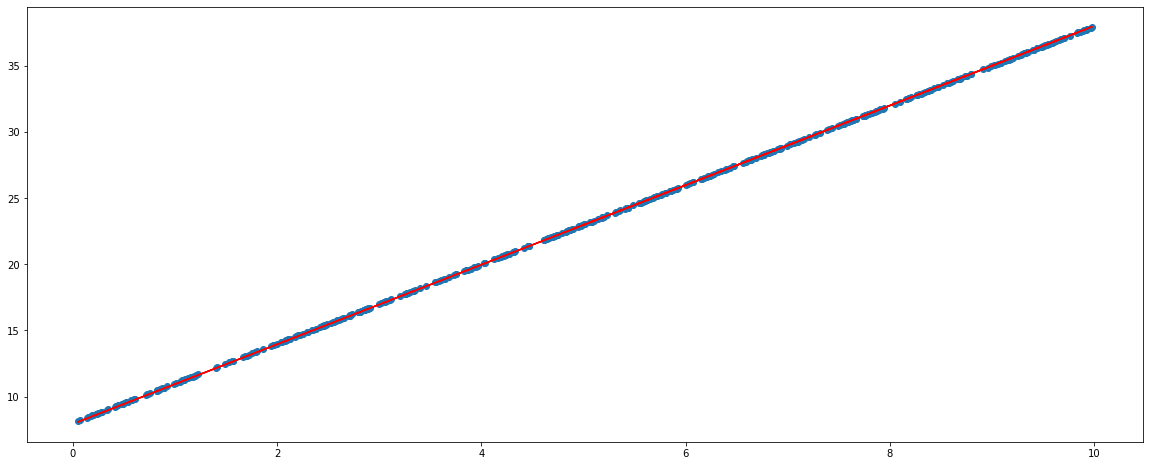

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.scatter(x.numpy().reshape(-1),y_true.numpy().reshape(-1))
y_predict = torch.matmul(x,w)+b
plt.plot(x.numpy().reshape(-1),y_predict.detach().numpy().reshape(-1),c="red")
plt.show()